# [E-11] ARIMA Stock Prediction
"Exploration Node 11. Time Series Forcasting & ARIMA" / 2022. 02. 17 (Thu) 이형주

## Contents
---
- **1. Strategic approach to this project**
- **2. Environment Setup & Model Preparations**
- **3. ARIMA**
- **4. Another Stock Trial (AMD)**
- **5. Another Stock Trial (Apple)**
- **6. Project Retrospective**


## Rubric Evaluation Standards
---

|  평가문항  |  상세기준  |
|:---------|:---------|
|1. 시계열의 안정성이 충분히 확인되었는가?|플로팅과 adfuller 메소드가 모두 적절히 사용되었음
|2. ARIMA 모델 모수선택 근거를 체계적으로 제시하였는가?|p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시됨
|3. 예측 모델의 오차율이 기준 이하로 정확하게 나왔는가?|3개 이상 종목이 MAPE 15% 미만의 정확도로 예측됨

## 1. Strategic approach to this project

아래 자료들을 참고하였다.

+ [Duke University의 Robert Nau 논문: Statistical forecasting:
notes on regression and time series analysis](https://people.duke.edu/~rnau/411home.html)
+ [ARIMA, Python으로 하는 시계열분석 (feat. 비트코인 가격예측)](https://byeongkijeong.github.io/ARIMA-with-Python/)
+ [추정과 차수 선택](https://otexts.com/fppkr/arima-estimation.html)
+ [계절성 ARIMA 모델](https://otexts.com/fppkr/seasonal-arima.html): p,d,q 값이 3이 넘어갈 수도 있다는 걸 확인
+ [4-2장-3절. 시계열 분석 - ARIMa(p,d,q) 모델 실습](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=khrock89&logNo=220171772873): auto.arima는 무엇?
+ [ARMA model - 자기회귀이동평균](https://sodayeong.tistory.com/47)

## 2. Environment Setup & DataSet Preparations

In [1]:
## environment setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'

# index_col=['column_name']으로 설정해주면 날짜/시간을 pandas의 DataFrame의 index로 바로 읽어올 수 있습니다.
# parse_dates=['date'] 처럼 명시적으로 칼럼 이름을 설정하는 방법도 가능
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
nvda = df['Close']

print(type(nvda))
nvda.head()

<class 'pandas.core.series.Series'>


Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

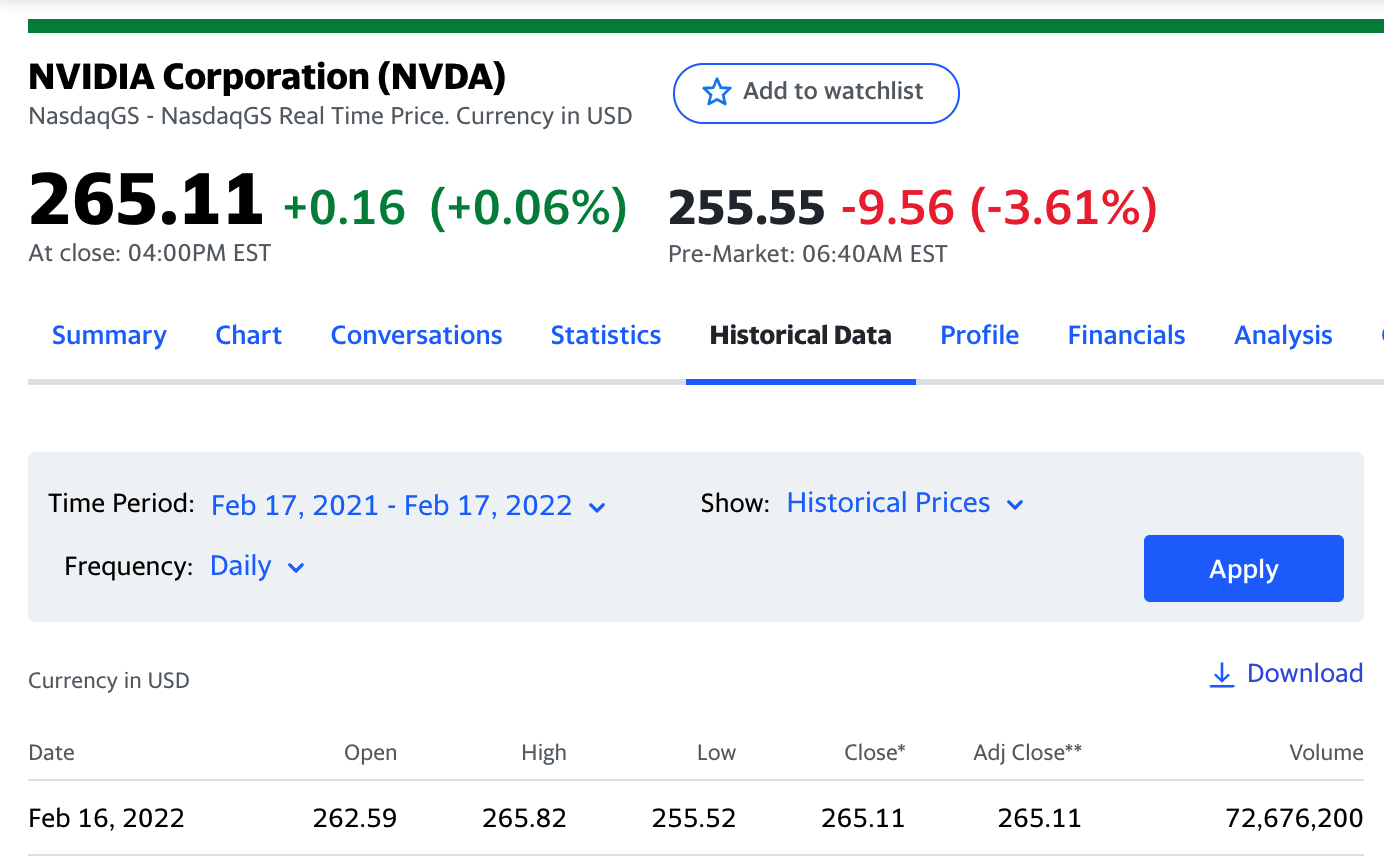

In [2]:
df.info()
## Yahoo Finance 데이터로 진행

# column: Date, Open, High, Low, Close, Adj Close, Volume
# Close (장 마감가격) 기준으로

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2020-05-18 to 2021-05-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [3]:
## 결측치 확인
# pandas.DataFrame.interpolate(): time 메서드를 보간한다.
nvda = nvda.interpolate(method='time')

# Time Series에서 결측치가 있는 부분만 Series로 출력해보기
nvda[nvda.isna()] ## 결측치 없음 확인

Series([], Name: Close, dtype: float64)

In [4]:
nvda_log = np.log(nvda)
nvda_log

Date
2020-05-18    10.795486
2020-05-19    10.825760
2020-05-20    10.819778
2020-05-21    10.818778
2020-05-22    10.794460
                ...    
2021-05-12    11.289782
2021-05-13    11.270854
2021-05-14    11.291031
2021-05-17    11.284769
2021-05-18    11.284769
Name: Close, Length: 250, dtype: float64

### Data Pre-Processing

In [5]:
# 1st difference
nvda_diff = np.diff(nvda)
nvda_diff

array([ 1500.,  -300.,   -50., -1200.,   100.,   400.,   650.,   500.,
         300.,   500.,   200.,  3100.,   100.,   900.,  -600.,   600.,
        -100., -1100., -2000., -2400.,  2200.,   100.,   100.,   600.,
        -900.,  -600.,  1500., -1000.,  1400.,  -900.,   400.,  -200.,
         300.,   700.,  1400., -1600.,  -400.,  -200.,  -100.,   700.,
         400.,   900.,  -900.,   600.,  -200.,  1100.,  -600.,  -600.,
         100.,  1400.,  3000.,   400.,     0., -1100., -1100.,   500.,
        -400.,  1100.,  -500.,   300.,   400.,   800.,  -300.,  -700.,
         400.,  -600., -2400.,   500.,   200.,   300.,     0.,  -800.,
        -200., -1400.,   200.,   200.,  2000.,  -800.,   900.,  2200.,
        -300.,   800.,  -200.,  1400.,   600.,     0., -1500.,  -200.,
        -100., -1000.,   400.,  -800.,   100.,   300.,     0.,   500.,
         300.,   900.,  -200.,   700.,   500.,     0.,  -900.,  -500.,
         500.,   900.,     0.,  -800.,   100.,   200.,  -600.,  -800.,
      

In [6]:
## removes 'moving average' data

mv_avg = nvda_log.rolling(window=12).mean()
nvda_log_mv_avg = nvda_log - mv_avg # 변화량 제거
nvda_log_mv_avg

nvda_log_mv_avg.dropna(inplace=True)

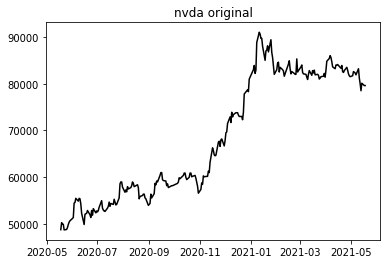

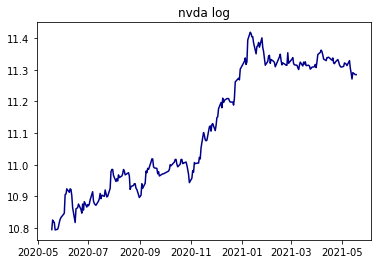

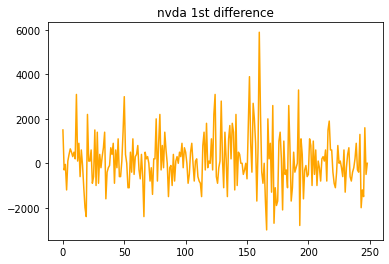

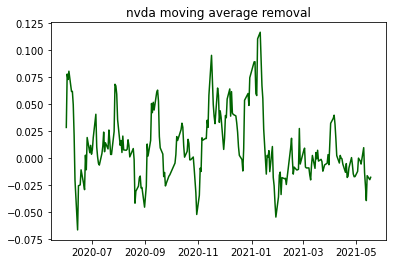

In [7]:
## visualization

# 1. original
plt.plot(nvda, color='black')
plt.title('nvda original')
plt.show()

# 2. original -> log transformation
plt.plot(nvda_log, color='darkblue')
plt.title('nvda log')
plt.show()

# 3. 1st difference
plt.plot(nvda_diff, color='orange')
plt.title('nvda 1st difference')
plt.show()

# 4. removes 'Moving average'
plt.plot(nvda_log_mv_avg, color='darkgreen')
plt.title('nvda moving average removal')
plt.show()

In [8]:
## Time Series Analysis

def plot_rolling_statistics(timeseries, window=12):
    
    # 이동평균 시계열
    rolmean = timeseries.rolling(window=window).mean()
    # 이동표준편차 시계열
    rolstd = timeseries.rolling(window=window).std() 

    # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

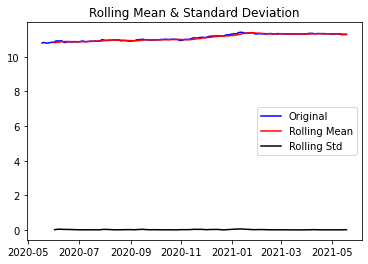

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [9]:
## ADF Test

# Plot rolling statistics
plot_rolling_statistics(nvda_log, window=12)
#augemented dickey fuller test
augmented_dickey_fuller_test(nvda_log)

## p-value: 유의확률
## ADF Test: 시계열 데이터의 정상성을 테스트
    # 보통 95% 신뢰구간에서 오차 범위를 추정하며, 여기서 0.05이하의 p값에서 '유의미'(significant)하다고 표현
    # p-value가 0.590149이므로 정상성을 띄지 않는다고 볼 수 있으며, 
    # Moving average로 진행하여 로그 변환할 경우 p-value의 개선이 기대됨

In [10]:
augmented_dickey_fuller_test(nvda_log_mv_avg)
# p-value for removed moving average -> 0.000759 (정상적 시계열)

Results of Dickey-Fuller Test:
Test Statistic                  -4.163469
p-value                          0.000759
#Lags Used                       0.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64


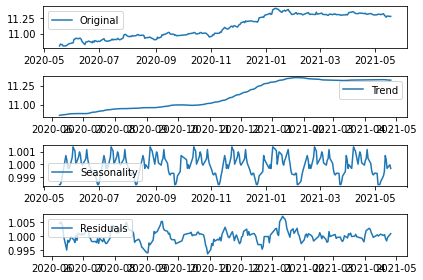

In [11]:
## Time Series Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(nvda_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(nvda_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [12]:
## Residual

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

# p-value (6.234854e-08) < less than 0.005
# 정상성 시계열 확인 (귀무가설 기각)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


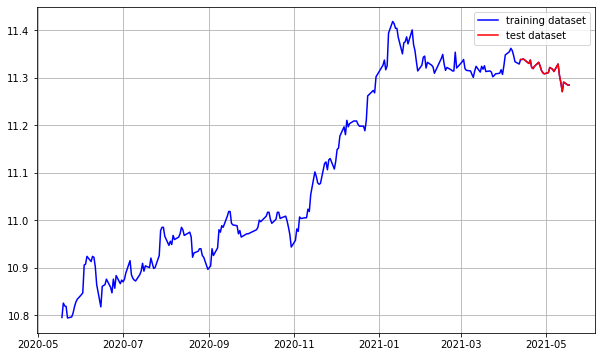

In [13]:
## DataSet Preparations

train_data, test_data = nvda_log[:int(len(nvda_log)*0.9)], nvda_log[int(len(nvda_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(nvda_log, c='b', label='training dataset')
plt.plot(test_data, c='r', label='test dataset')
plt.legend()

## 3. ARIMA

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


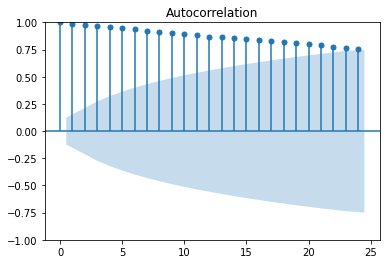

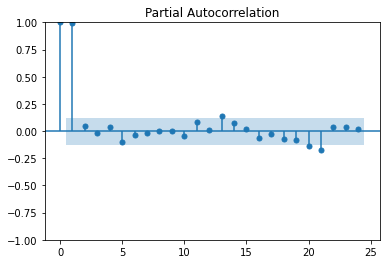

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF : Autocorrelation 그래프 그리기
plot_acf(nvda_log)
# PACF : Partial Autocorrelation 그래프 그리기
plot_pacf(nvda_log)
plt.show()

Source: Robert Nau @Duke university, [ARIMA, Python으로 하는 시계열분석 (feat. 비트코인 가격예측)](https://byeongkijeong.github.io/ARIMA-with-Python/)

+ ARIMA의 모수는 크게 3가지가 있다. AR모형의 Lag을 의미하는 p, MA모형의 Lag을 의미하는 q, 차분(Diffrence)횟수를 의미하는 d 가 그것이다. 보통은 p, d, q의 순서로 쓴다. 통상적으로 p + q < 2, p * q = 0 인 값들을 많이 사용한다.

+ 여기서 p * q = 0 이라 하면, 두 값중 하나는 0이라는 이야기이다. ARIMA는 AR모형과 MA모형을 하나로 합쳤다면서 둘 중 하나의 모수가 0인건 또 무슨소리? 라고 할지 모르겠지만, 실제로 대부분의 시계열 자료에서는 하나의 경향만을 강하게 띄기 때문에, 이렇게 사용하는것이 더 잘 맞는다고 한다. 그렇다면, p와 d, q는 어떻게 정해야 할까? Rules of thumb이긴 하지만 ACF plot와 PACF plot을 통해 AR 및 MA의 모수를 추정할 수 있다.

    - **ACF(Autocorrelation function) : Lag에 따른 관측치들 사이의 관련성을 측정하는 함수**
    - **PACF(Partial autocorrelation function) : k 이외의 모든 다른 시점 관측치의 영향력을 배제하고 eq_yt와 eq_ytk 두 관측치의 관련성을 측정하는 함수**

    + **시계열 데이터가 AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF는 처음 시차를 제외하고 급격히 감소한다.**
    + 반대로, MA의 특성을 띄는 경우 ACF는 급격히 감소하고 PACF는 천천히 감소한다. 급격히 감소하는 시차를 각 AR과 MA 모형의 모수(p, q)로 사용할 수 있다. 또한 데이터를 차분하여 ACF 및 PACF 계산함으로써 적절한 차분횟수까지 구할 수 있다.

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


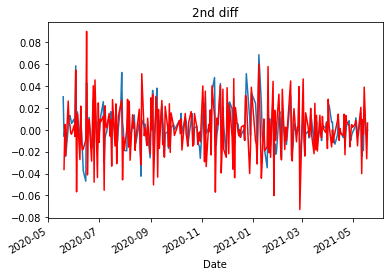

In [15]:
# 차분 안정성 확인
## 1차 difference 값의 평균과 분산이 상대적으로 더 일정함
diff_1 = nvda_log.diff(periods=1).iloc[1:]
diff_1.plot(title='1st diff')

augmented_dickey_fuller_test(diff_1)

diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='2nd diff', color='red')

augmented_dickey_fuller_test(diff_2)

In [16]:
## p=1, d=1, q=0

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1, 1, 0))
fitted_m = model.fit()

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 583.488
Date:                Thu, 17 Feb 2022   AIC                          -1162.976
Time:                        13:55:22   BIC                          -1156.153
Sample:                             0   HQIC                         -1160.222
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0333      0.061      0.545      0.586      -0.086       0.153
sigma2         0.0003   2.42e-05     13.219      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.06   Jarque-

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


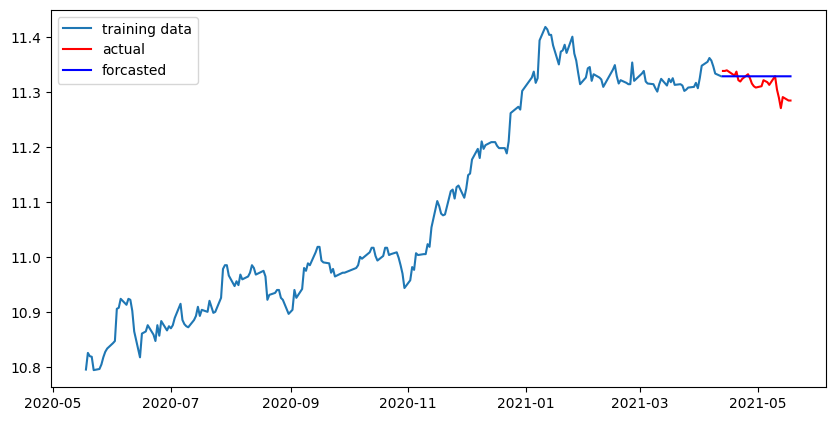

In [17]:
## visualization
## Forecasted Trend가 대부분 일치하고 있음

forecast = fitted_m.forecast(len(test_data))
forecast = np.array(forecast)
forecast_series = pd.Series(forecast, index=test_data.index)

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(train_data, label="training data")
plt.plot(test_data, c="r", label="actual")
plt.plot(forecast_series, c="b", label="forcasted")
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

## MSE(Mean Squared Error): 오차 제곱한 값 평균
## MAE(Mean Absolute Error): 오차 절댓값 평균
## RMSE(Root Mean Squared Error): MSE 제곱근
## MAPE(Mean Absolute Percentage Error): 오차를 예측값으로 나눈 절댓값의 평균

mse = mean_squared_error(np.exp(test_data), np.exp(forecast))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(forecast))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(forecast)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(forecast) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  3480513.747715865
MAE:  1403.033723618997
RMSE:  1865.6135043775453
MAPE: 1.74%


## 4. Another Stock Trial (AMD)

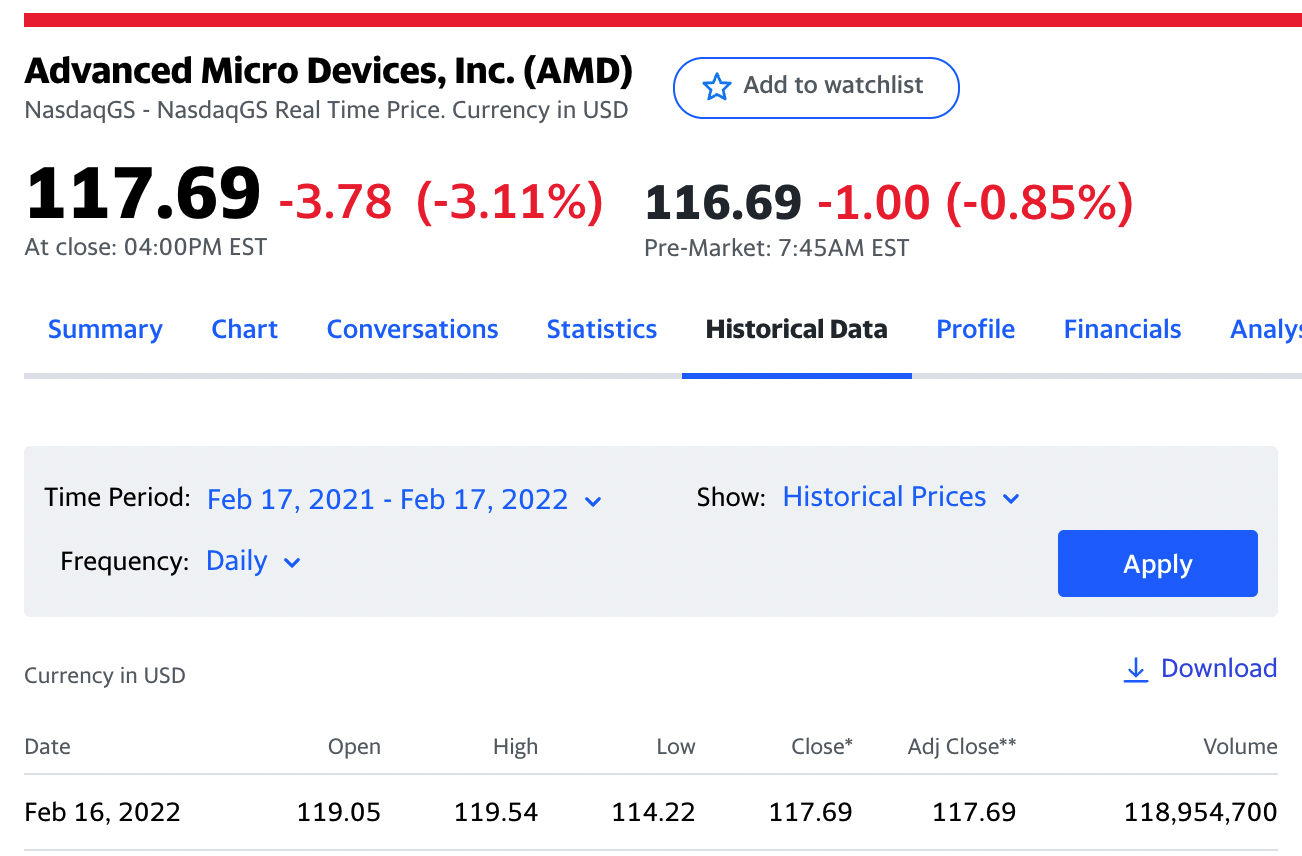

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-02-17 to 2022-02-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       254 non-null    float64
 1   High       254 non-null    float64
 2   Low        254 non-null    float64
 3   Close      254 non-null    float64
 4   Adj Close  254 non-null    float64
 5   Volume     254 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


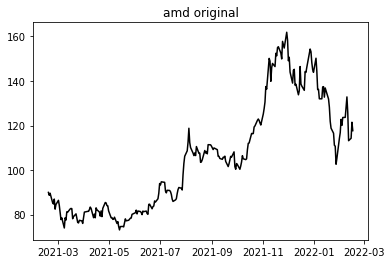

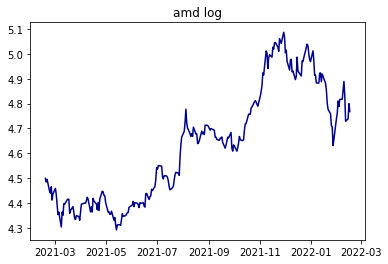

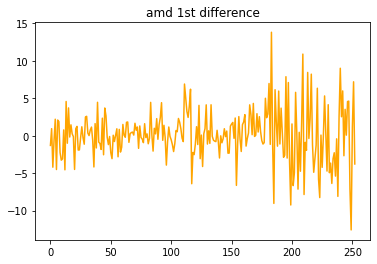

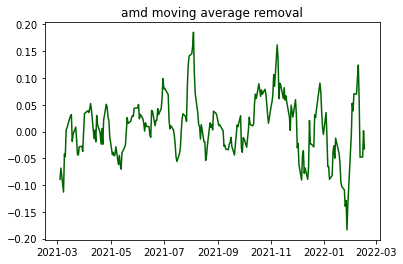

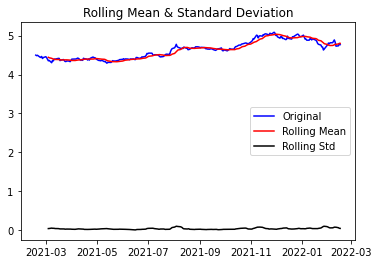

Results of Dickey-Fuller Test:
Test Statistic                  -1.029396
p-value                          0.742392
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -4.411193
p-value                          0.000284
#Lags Used                       1.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -5.757424e+00
p-value                        5.776295e-07
#Lags Used                     9.000000e+00
Number of Observations Used    2.140000e+02
Critical Value (1%)           -3.461282e+00
Critical Value (5%)           -2.875143e+00
Critical Value (10%)     

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


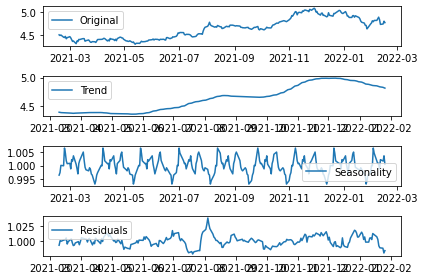

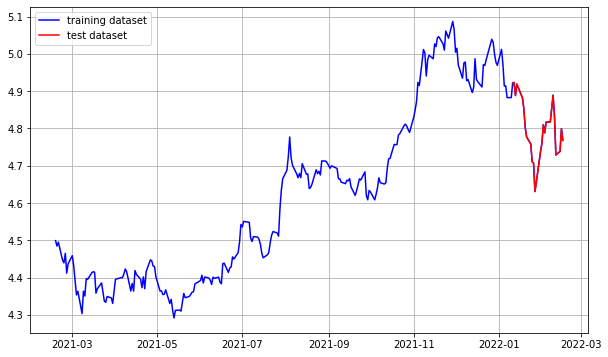

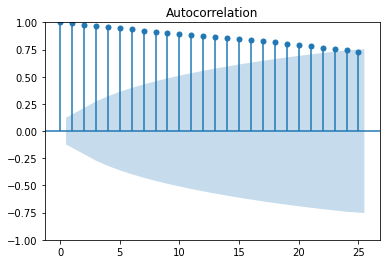

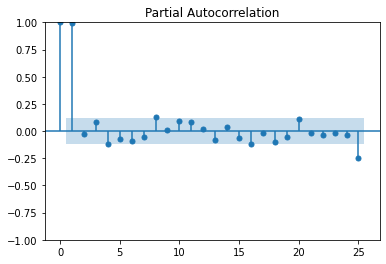

Results of Dickey-Fuller Test:
Test Statistic                -1.601235e+01
p-value                        6.335332e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.422174e+00
p-value                        6.691738e-11
#Lags Used                     1.400000e+01
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


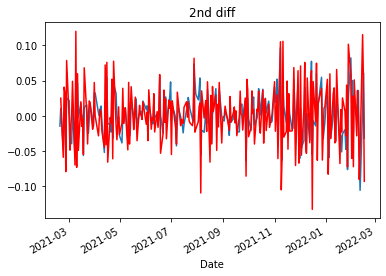

In [19]:
### environment setup
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AMD.csv'

# index_col=['column_name']으로 설정해주면 날짜/시간을 pandas의 DataFrame의 index로 바로 읽어올 수 있습니다.
# parse_dates=['date'] 처럼 명시적으로 칼럼 이름을 설정하는 방법도 가능
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
amd = df['Close']

print(type(amd))
amd.head()

### data info
df.info()

### 결측치 확인
# pandas.DataFrame.interpolate(): time 메서드를 보간한다.
amd = amd.interpolate(method='time')
# Time Series에서 결측치가 있는 부분만 Series로 출력해보기
amd[amd.isna()] ## 결측치 없음 확인
amd_log = np.log(amd)
amd_log

### data pre-processing

## 1st difference
amd_diff = np.diff(amd)
amd_diff

## removes 'moving average' data
mv_avg = amd_log.rolling(window=12).mean()
amd_log_mv_avg = amd_log - mv_avg # 변화량 제거
amd_log_mv_avg

amd_log_mv_avg.dropna(inplace=True)

## visualization
# 1. original
plt.plot(amd, color='black')
plt.title('amd original')
plt.show()
# 2. original -> log transformation
plt.plot(amd_log, color='darkblue')
plt.title('amd log')
plt.show()
# 3. 1st difference
plt.plot(amd_diff, color='orange')
plt.title('amd 1st difference')
plt.show()
# 4. removes 'Moving average'
plt.plot(amd_log_mv_avg, color='darkgreen')
plt.title('amd moving average removal')
plt.show()

### Time Series Analysis

## Plot rolling statistics
plot_rolling_statistics(amd_log, window=12)
## ADF Test
augmented_dickey_fuller_test(amd_log)
## ADF Test for removed moving average
augmented_dickey_fuller_test(amd_log_mv_avg)

## Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(amd_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(amd_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Residual
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

## DataSet Preparations
train_data, test_data = amd_log[:int(len(amd_log)*0.9)], amd_log[int(len(amd_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(amd_log, c='b', label='training dataset')
plt.plot(test_data, c='r', label='test dataset')
plt.legend()

### ARIMA
## ACF : Autocorrelation 그래프 그리기
plot_acf(amd_log)
## PACF : Partial Autocorrelation 그래프 그리기
plot_pacf(amd_log)
plt.show()

## 차분 안정성 확인
# 1차 difference 값의 평균과 분산이 상대적으로 더 일정함
diff_1 = amd_log.diff(periods=1).iloc[1:]
diff_1.plot(title='1st diff')

augmented_dickey_fuller_test(diff_1)

diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='2nd diff', color='red')

augmented_dickey_fuller_test(diff_2)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 496.405
Date:                Thu, 17 Feb 2022   AIC                           -976.811
Time:                        13:55:26   BIC                           -949.376
Sample:                             0   HQIC                          -965.742
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6482      0.179     25.964      0.000       4.297       4.999
ar.L1          1.2326      1.199      1.028      0.304      -1.118       3.584
ar.L2          0.0055      2.211      0.002      0.9

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


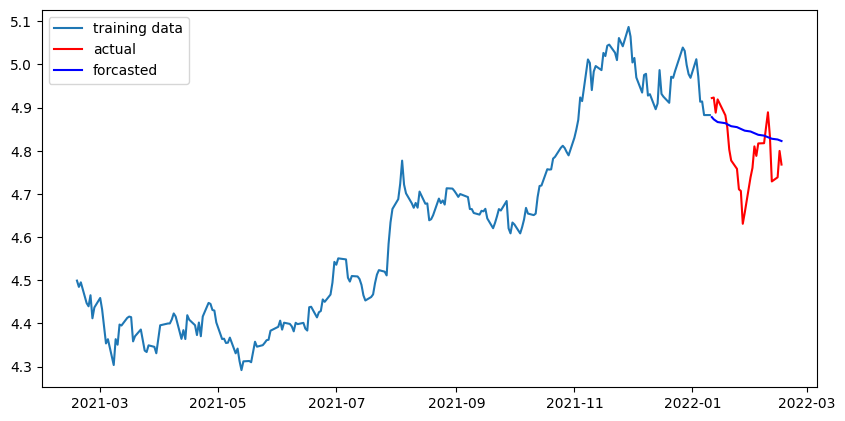

In [20]:
## p=3, d=0, q=3

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(3, 0, 3))
fitted_m = model.fit()

print(fitted_m.summary())

## visualization
## Forecasted Trend가 대부분 일치하고 있음

forecast = fitted_m.forecast(len(test_data))
forecast = np.array(forecast)
forecast_series = pd.Series(forecast, index=test_data.index)

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(train_data, label="training data")
plt.plot(test_data, c="r", label="actual")
plt.plot(forecast_series, c="b", label="forcasted")
plt.legend()
plt.show()

+ Why 3,0,3?
    -  PACF에서 급격히 떨어지는 지점 (2,3회)을 p와 q값으로 지정

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

## MSE(Mean Squared Error): 오차 제곱한 값 평균
## MAE(Mean Absolute Error): 오차 절댓값 평균
## RMSE(Root Mean Squared Error): MSE 제곱근
## MAPE(Mean Absolute Percentage Error): 오차를 예측값으로 나눈 절댓값의 평균

mse = mean_squared_error(np.exp(test_data), np.exp(forecast))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(forecast))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(forecast)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(forecast) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  108.2045384485651
MAE:  8.285944047202555
RMSE:  10.4021410511762
MAPE: 7.18%


## 5. Another Stock Trial (Apple)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-02-17 to 2022-02-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       254 non-null    float64
 1   High       254 non-null    float64
 2   Low        254 non-null    float64
 3   Close      254 non-null    float64
 4   Adj Close  254 non-null    float64
 5   Volume     254 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


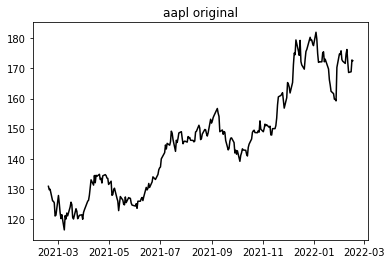

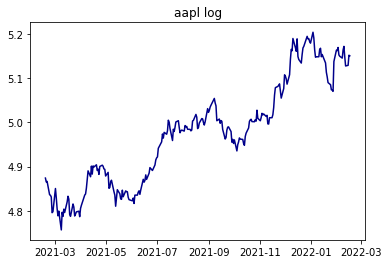

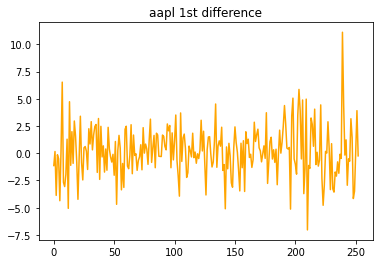

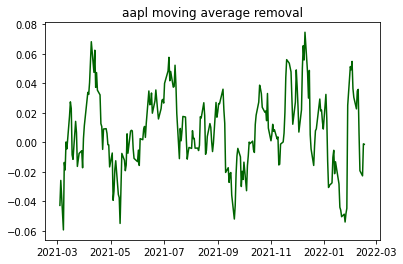

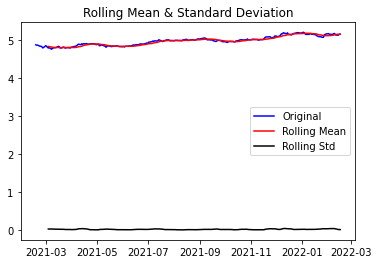

Results of Dickey-Fuller Test:
Test Statistic                  -0.690251
p-value                          0.849259
#Lags Used                       0.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -4.583698
p-value                          0.000138
#Lags Used                       1.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -4.449081
p-value                          0.000243
#Lags Used                       6.000000
Number of Observations Used    217.000000
Critical Value (1%)             -3.460849
Critical Value (5%)             -2.874953
Critical Value (10%)            -2.57

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


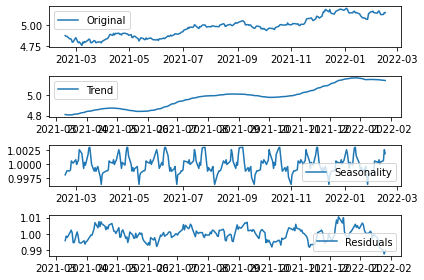

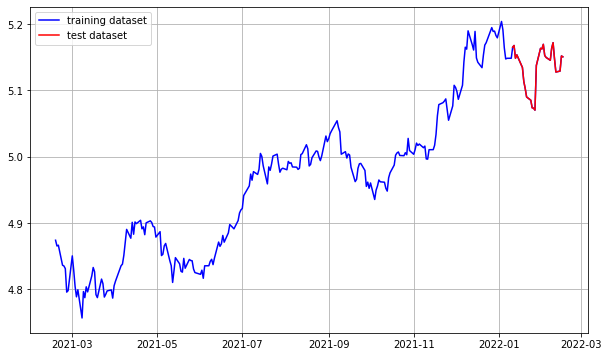

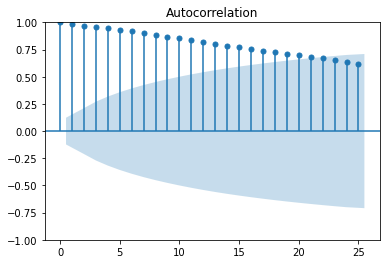

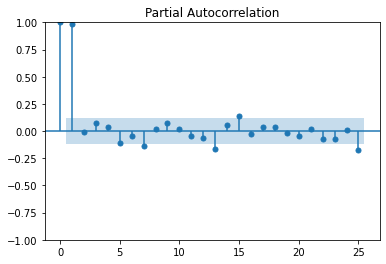

Results of Dickey-Fuller Test:
Test Statistic                -1.613159e+01
p-value                        4.778989e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.700936e+00
p-value                        1.339935e-11
#Lags Used                     1.300000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


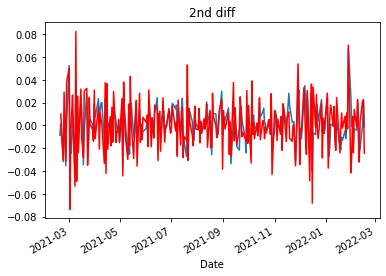

In [22]:
### environment setup
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'

# index_col=['column_name']으로 설정해주면 날짜/시간을 pandas의 DataFrame의 index로 바로 읽어올 수 있습니다.
# parse_dates=['date'] 처럼 명시적으로 칼럼 이름을 설정하는 방법도 가능
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
aapl = df['Close']

print(type(aapl))
aapl.head()

### data info
df.info()

### 결측치 확인
# pandas.DataFrame.interpolate(): time 메서드를 보간한다.
aapl = aapl.interpolate(method='time')
# Time Series에서 결측치가 있는 부분만 Series로 출력해보기
aapl[aapl.isna()] ## 결측치 없음 확인
aapl_log = np.log(aapl)
aapl_log

### data pre-processing

## 1st difference
aapl_diff = np.diff(aapl)
aapl_diff

## removes 'moving average' data
mv_avg = aapl_log.rolling(window=12).mean()
aapl_log_mv_avg = aapl_log - mv_avg # 변화량 제거
aapl_log_mv_avg

aapl_log_mv_avg.dropna(inplace=True)

## visualization
# 1. original
plt.plot(aapl, color='black')
plt.title('aapl original')
plt.show()
# 2. original -> log transformation
plt.plot(aapl_log, color='darkblue')
plt.title('aapl log')
plt.show()
# 3. 1st difference
plt.plot(aapl_diff, color='orange')
plt.title('aapl 1st difference')
plt.show()
# 4. removes 'Moving average'
plt.plot(aapl_log_mv_avg, color='darkgreen')
plt.title('aapl moving average removal')
plt.show()

### Time Series Analysis

## Plot rolling statistics
plot_rolling_statistics(aapl_log, window=12)
## ADF Test
augmented_dickey_fuller_test(aapl_log)
## ADF Test for removed moving average
augmented_dickey_fuller_test(aapl_log_mv_avg)

## Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(aapl_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(aapl_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Residual
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

## DataSet Preparations
train_data, test_data = aapl_log[:int(len(aapl_log)*0.9)], aapl_log[int(len(aapl_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(aapl_log, c='b', label='training dataset')
plt.plot(test_data, c='r', label='test dataset')
plt.legend()

### ARIMA
## ACF : Autocorrelation 그래프 그리기
plot_acf(aapl_log)
## PACF : Partial Autocorrelation 그래프 그리기
plot_pacf(aapl_log)
plt.show()

## 차분 안정성 확인
# 1차 difference 값의 평균과 분산이 상대적으로 더 일정함
diff_1 = aapl_log.diff(periods=1).iloc[1:]
diff_1.plot(title='1st diff')

augmented_dickey_fuller_test(diff_1)

diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='2nd diff', color='red')

augmented_dickey_fuller_test(diff_2)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 628.317
Date:                Thu, 17 Feb 2022   AIC                          -1252.633
Time:                        13:55:28   BIC                          -1245.784
Sample:                             0   HQIC                         -1249.869
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0637      0.063     -1.004      0.316      -0.188       0.061
sigma2         0.0002   1.98e-05     11.682      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.02   Jarque-

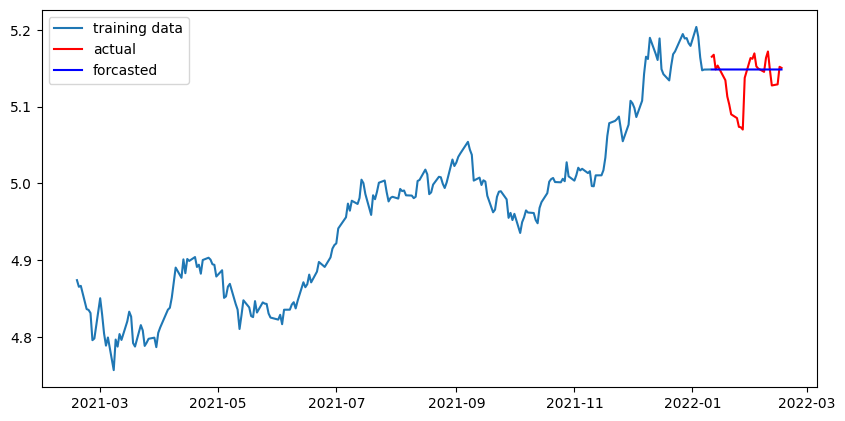

In [23]:
## p=1, d=1, q=0

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1, 1, 0))
fitted_m = model.fit()

print(fitted_m.summary())

## visualization
## Forecasted Trend가 대부분 일치하고 있음

forecast = fitted_m.forecast(len(test_data))
forecast = np.array(forecast)
forecast_series = pd.Series(forecast, index=test_data.index)

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(train_data, label="training data")
plt.plot(test_data, c="r", label="actual")
plt.plot(forecast_series, c="b", label="forcasted")
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

## MSE(Mean Squared Error): 오차 제곱한 값 평균
## MAE(Mean Absolute Error): 오차 절댓값 평균
## RMSE(Root Mean Squared Error): MSE 제곱근
## MAPE(Mean Absolute Percentage Error): 오차를 예측값으로 나눈 절댓값의 평균

mse = mean_squared_error(np.exp(test_data), np.exp(forecast))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(forecast))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(forecast)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(forecast) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  34.00506490940173
MAE:  4.151925684330013
RMSE:  5.831386191069987
MAPE: 2.51%


## 6. Project Retrospective

+ 각 MAPE를 목표치보다 낮게 달성하였다. (Rubric: 15% or below)
    - Nvidia: 1.74%
    - AMD: 7.18%
    - Apple: 2.51%  
+ ARIMA 모델에서 AR일 때 1,1,0(p,d,q) 에만 매달리지 않고 다양한 값을 입력해본 것이 Prediction 정확도를 높이는데 기여한 것으로 판단된다. 그러나 왜 3,0,3을 AMD에 대입하였을 때 prediction이 가장 정확하였는가?에 대해서는 수학적인 이해가 추가로 더 필요해 보인다.
+ 계절성, 비계절성 ARIMA에 대한 추가 학습이 진행되면 조금 더 모델 설계를 정교하게 할 수 있겠다는 생각이 들었다.